In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_train = pd.read_csv('ds_project_3_train.csv')
df_test = pd.read_csv('ds_project_3_test.csv')

In [3]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train = df_train[['LotArea','YearBuilt','OverallQual', 'OverallCond','GrLivArea','MiscFeature','GarageArea',\
                     'KitchenQual', 'SalePrice']]

In [7]:
df_train

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
0,8450,2003,7,5,1710,NaN,548,Gd,208500
1,9600,1976,6,8,1262,NaN,460,TA,181500
2,11250,2001,7,5,1786,NaN,608,Gd,223500
3,9550,1915,7,5,1717,NaN,642,Gd,140000
4,14260,2000,8,5,2198,NaN,836,Gd,250000
...,...,...,...,...,...,...,...,...,...
1455,7917,1999,6,5,1647,NaN,460,TA,175000
1456,13175,1978,6,6,2073,NaN,500,TA,210000
1457,9042,1941,7,9,2340,Shed,252,Gd,266500
1458,9717,1950,5,6,1078,NaN,240,Gd,142125


In [8]:
df_test = df_test[['LotArea','YearBuilt','OverallQual', 'OverallCond','GrLivArea','MiscFeature','GarageArea',\
                     'KitchenQual']]

In [9]:
df_test

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,11622,1961,5,6,896,NaN,730.0,TA
1,14267,1958,6,6,1329,Gar2,312.0,Gd
2,13830,1997,5,5,1629,NaN,482.0,TA
3,9978,1998,6,6,1604,NaN,470.0,Gd
4,5005,1992,8,5,1280,NaN,506.0,Gd
...,...,...,...,...,...,...,...,...
1454,1936,1970,4,7,1092,NaN,0.0,TA
1455,1894,1970,4,5,1092,NaN,286.0,TA
1456,20000,1960,5,7,1224,NaN,576.0,TA
1457,10441,1992,5,5,970,Shed,0.0,TA


In [10]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

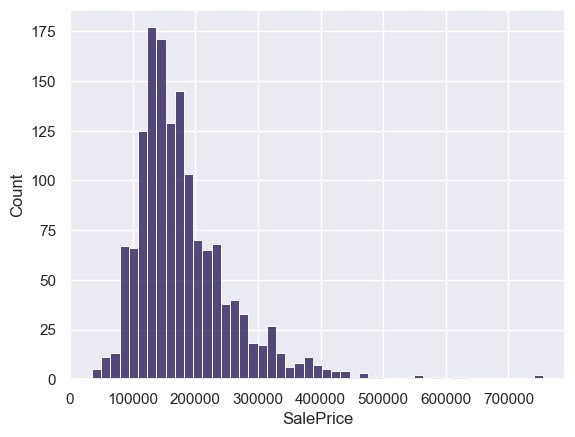

In [12]:
sns.set_theme(palette='magma')
sns.histplot(df_train['SalePrice'])
plt.show()

In [13]:
print(f"Skewness: {df_train['SalePrice'].skew()}")
print(f"Kurtosis: {df_train['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


# Scatterplot GrLivArea terhadap terget variable

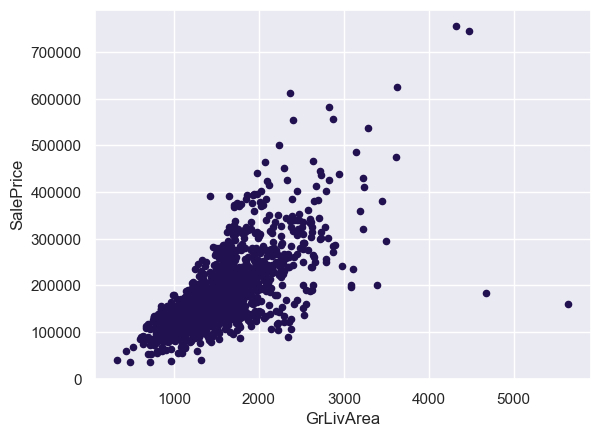

In [14]:
df_train.plot.scatter(x='GrLivArea', y='SalePrice')
plt.show()

# Boxplot antara OverallQual dengan target variable

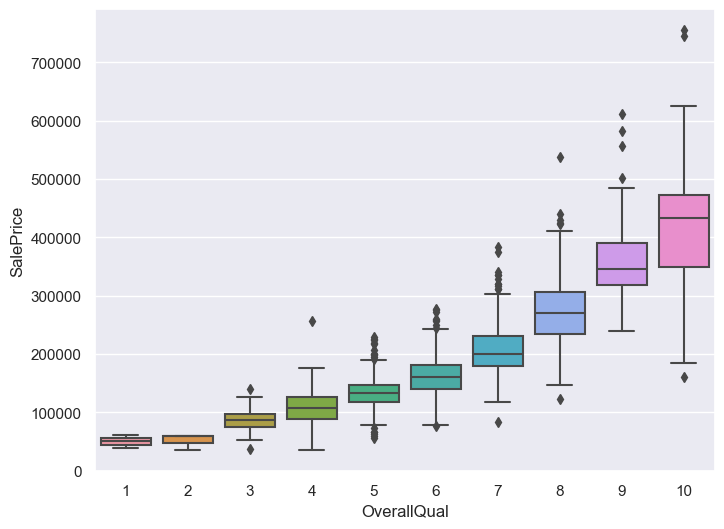

In [15]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)

In [17]:
df_train[(df_train['OverallQual']==10)&(df_train['SalePrice']<200000)]

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
523,40094,2007,10,5,4676,NaN,884,Ex,184750
1298,63887,2008,10,5,5642,NaN,1418,Ex,160000


# Boxplot antara YearBuilt dengan target variable

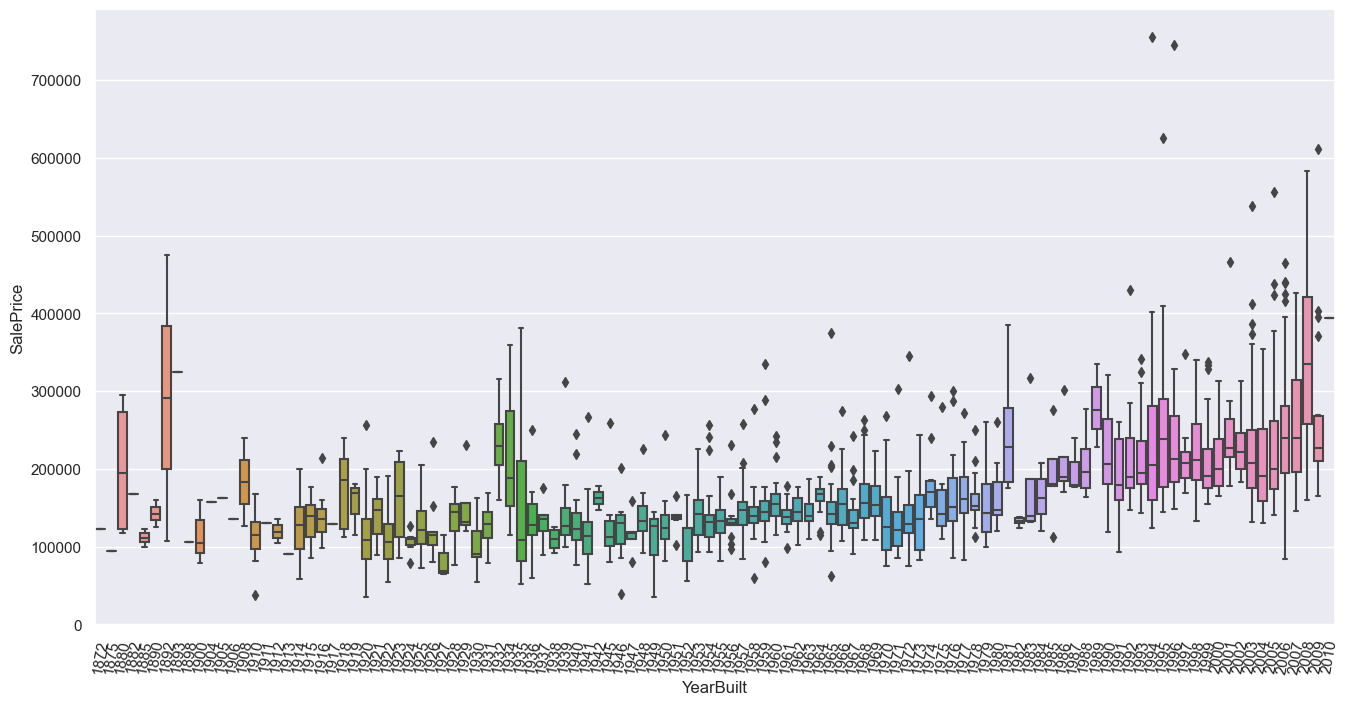

In [21]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
plt.xticks(rotation=80)
plt.show()

In [23]:
df_train['YearBuilt'].min()

1872

In [24]:
df_train['YearBuilt'].max()

2010

# Correlation map antar variable

In [28]:
numeric_df_train = df_train.replace('Shed', float('nan'))
numeric_df_train = df_train.select_dtypes(include='number')

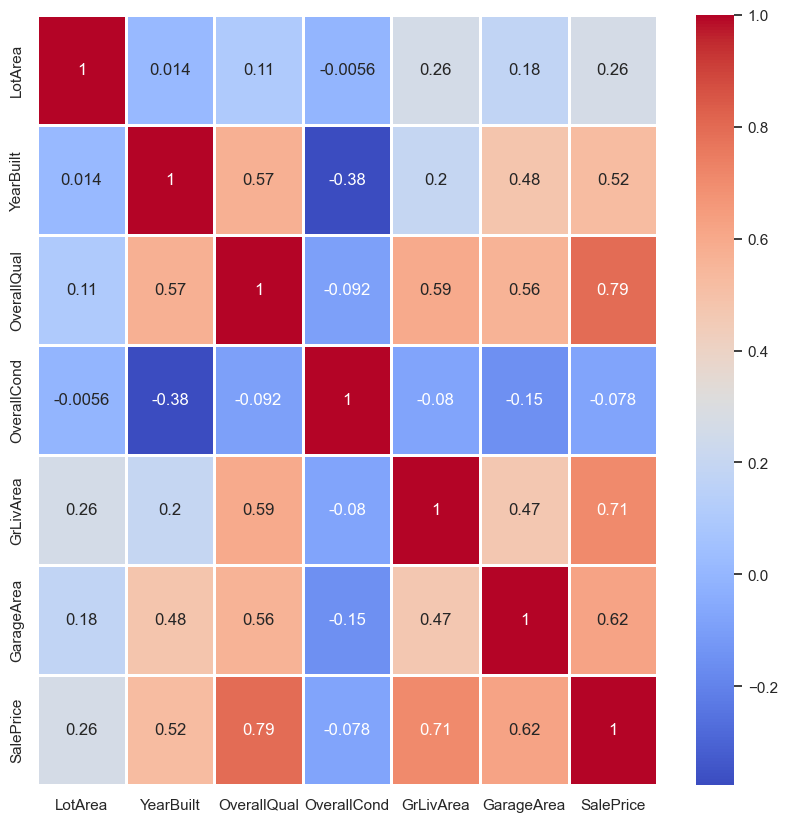

In [37]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(numeric_df_train.corr(), cmap = "coolwarm", annot=True, linewidth=2)

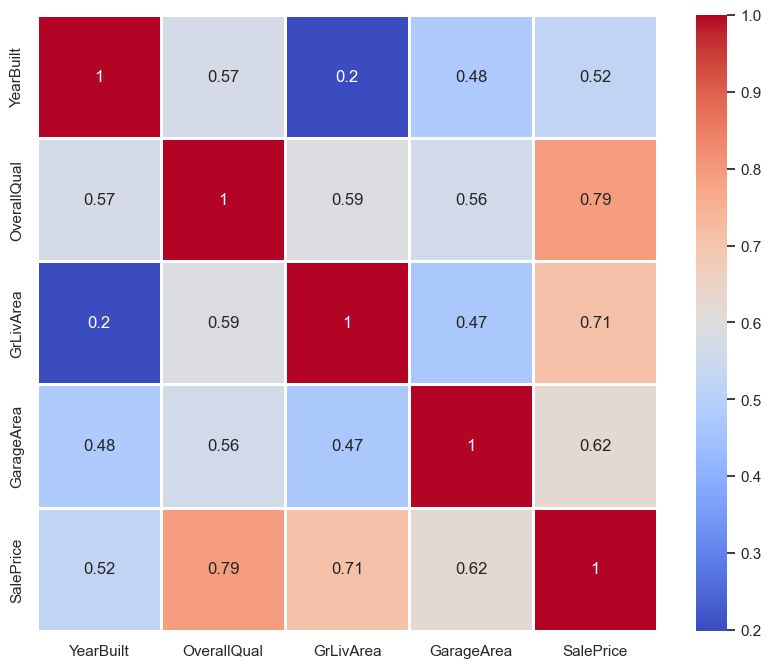

In [36]:
hig_corr = numeric_df_train.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["SalePrice"]) >= 0.5]

plt.figure(figsize=(10,8))
ax = sns.heatmap(df_train[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=2)

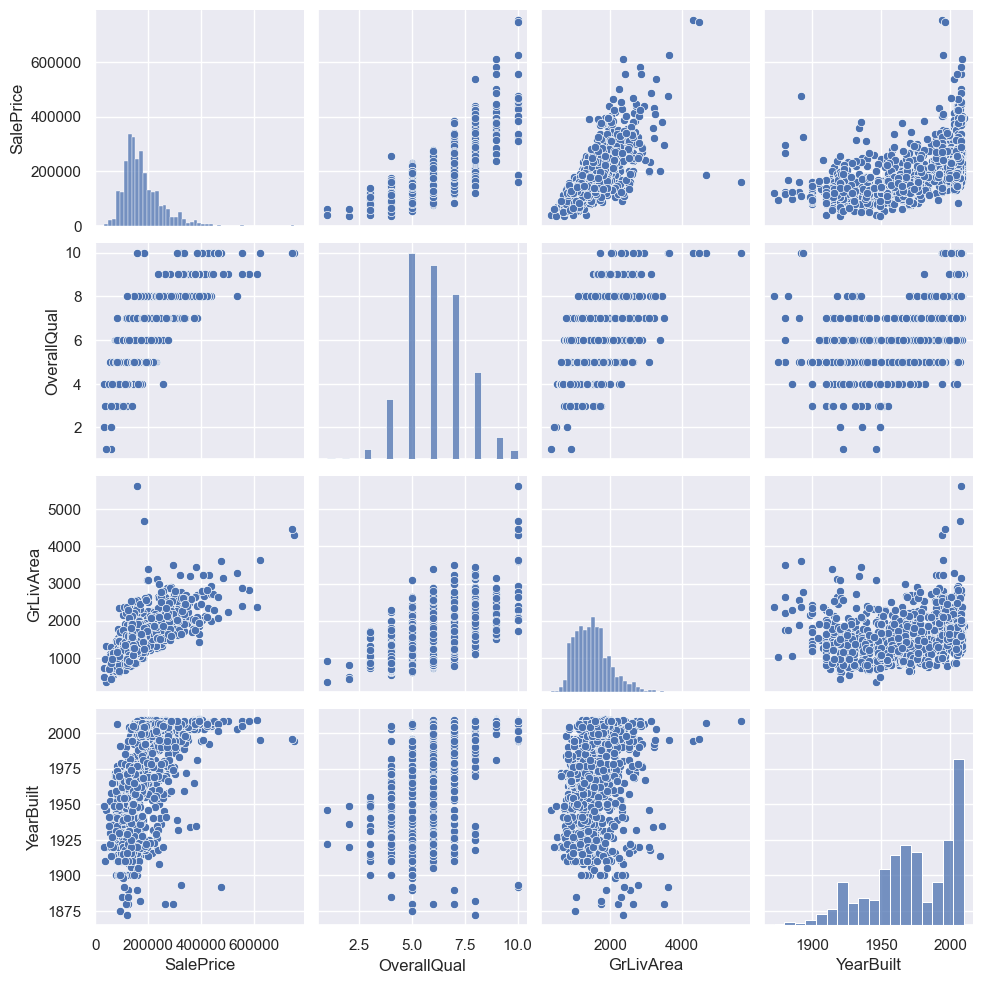

In [38]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

# Target Variable

## Comparing SalePrice with it's normal distribution

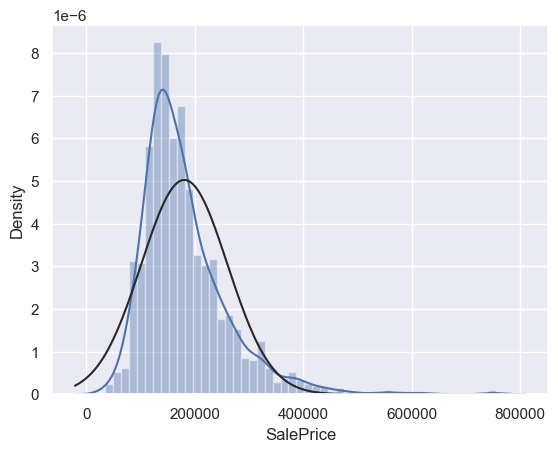

In [39]:
sns.distplot(df_train['SalePrice'], fit = norm);
plt.show()

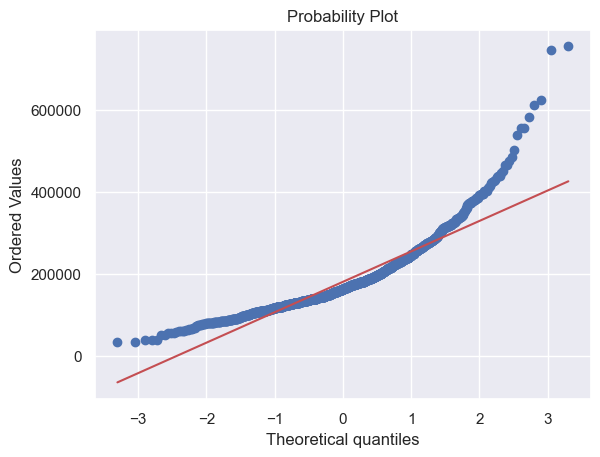

In [40]:
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()


 mu = 2.57 and sigma = 0.03



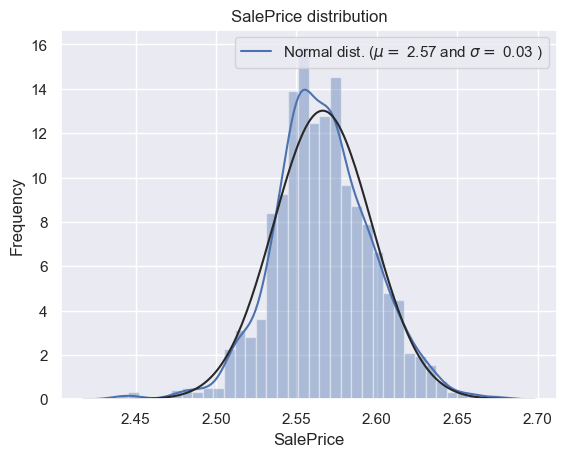

In [42]:
# We use the numpy function log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

# Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

# Print Mu dan Sigma
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot Distribusi
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.show()

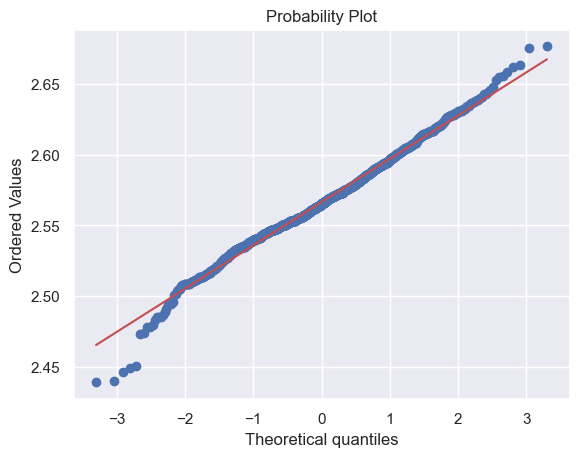

In [43]:
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

# Menggabungkan train set dan test set

In [44]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 8)


In [45]:
print(ntrain, ntest)

1460 1459


# Menghitung Missing Value

In [46]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MiscFeature,2814,0.964029
GarageArea,1,0.000343
KitchenQual,1,0.000343
LotArea,0,0.000000
YearBuilt,0,0.000000
OverallQual,0,0.000000
OverallCond,0,0.000000
GrLivArea,0,0.000000


In [47]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')
all_data['MiscFeature'].value_counts()

MiscFeature
None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: count, dtype: int64

In [48]:
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)
all_data['KitchenQual'].mode()[0]

'TA'

In [49]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [50]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [51]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      2919 non-null   int64  
 1   YearBuilt    2919 non-null   int64  
 2   OverallQual  2919 non-null   int64  
 3   OverallCond  2919 non-null   int64  
 4   GrLivArea    2919 non-null   int64  
 5   MiscFeature  2919 non-null   object 
 6   GarageArea   2919 non-null   float64
 7   KitchenQual  2919 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 182.6+ KB


In [52]:
all_data['MiscFeature'].value_counts()

MiscFeature
None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: count, dtype: int64

In [53]:
all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,None,548.0,Gd
1,9600,1976,6,8,1262,None,460.0,TA
2,11250,2001,7,5,1786,None,608.0,Gd
3,9550,1915,7,5,1717,None,642.0,Gd
4,14260,2000,8,5,2198,None,836.0,Gd
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,None,0.0,TA
2915,1894,1970,4,5,1092,None,286.0,TA
2916,20000,1960,5,7,1224,None,576.0,TA
2917,10441,1992,5,5,970,Shed,0.0,TA


# Feature Engineering


## Label Encoding

In [54]:
tmp_data = all_data.copy()

In [56]:
pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/e8/dd/41bc4dfa519bc1a0617b68496120c472f1a1a5db264132d1530c43f059a8/scikit_learn-1.3.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/28/08/9dcdaa5aac4634e4c23af26d92121f7ce445c630efa0d3037881ae2407fb/joblib-1.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 709.0 kB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 668.0 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [57]:
from sklearn.preprocessing import LabelEncoder
cols = ('OverallQual', 'OverallCond', 'KitchenQual') #masih sisa 'MiscFeature'
encoders = {}

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(tmp_data[c].values)) 
    tmp_data[c] = lbl.transform(list(tmp_data[c].values))
    encoders[c] = lbl

# shape        
print('Shape tmp_data: {}'.format(tmp_data.shape))

Shape tmp_data: (2919, 8)


In [58]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,4,1710,None,548.0,2
1,9600,1976,6,7,1262,None,460.0,3
2,11250,2001,7,4,1786,None,608.0,2
3,9550,1915,7,4,1717,None,642.0,2
4,14260,2000,8,4,2198,None,836.0,2
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,6,1092,None,0.0,3
2915,1894,1970,4,4,1092,None,286.0,3
2916,20000,1960,5,6,1224,None,576.0,3
2917,10441,1992,5,4,970,Shed,0.0,3


In [59]:
tmp_data['MiscFeature'].value_counts()

MiscFeature
None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: count, dtype: int64

# Skewness Treatment

In [61]:
from scipy.stats import norm, skew

numeric_feats = tmp_data.dtypes[tmp_data.dtypes != "object"].index

skewed_feats = tmp_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
LotArea,12.822431
GrLivArea,1.269358
OverallCond,0.570312
GarageArea,0.239257
OverallQual,-0.326653
YearBuilt,-0.599806
KitchenQual,-1.448023


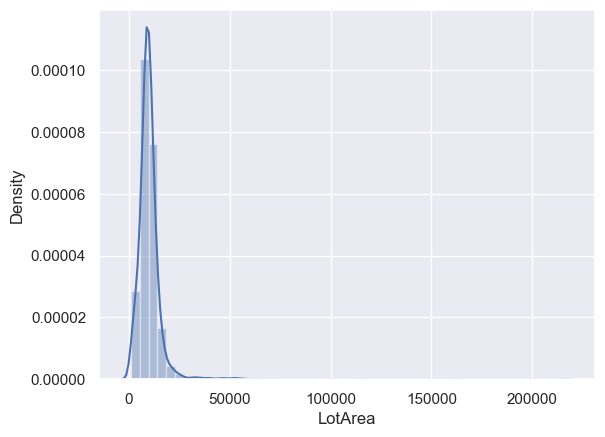

In [62]:
sns.distplot(tmp_data['LotArea']);

In [63]:
tmp_data['LotArea'].max()

215245

# Box Cox Transformation

In [64]:
skewness = skewness[abs(skewness['Skew']) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 3 skewed numerical features to Box Cox transform


In [65]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.20
for feat in skewed_features:
    tmp_data[feat] = boxcox1p(tmp_data[feat], lam)

In [66]:
skewness

,Skew
LotArea,12.822431
GrLivArea,1.269358
KitchenQual,-1.448023


In [67]:
skewed_features

Index(['LotArea', 'GrLivArea', 'KitchenQual'], dtype='object')

In [68]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,25.503637,2003,7,4,17.162564,None,548.0,1.228655
1,26.291998,1976,6,7,15.856944,None,460.0,1.597540
2,27.300424,2001,7,4,17.356042,None,608.0,1.228655
3,26.259338,1915,7,4,17.180669,None,642.0,1.228655
4,28.868815,2000,8,4,18.303173,None,836.0,1.228655
...,...,...,...,...,...,...,...,...
2914,17.719351,1970,4,6,15.262547,None,0.0,1.597540
2915,17.619961,1970,4,4,15.262547,None,286.0,1.597540
2916,31.239346,1960,5,6,15.729901,None,576.0,1.597540
2917,26.821947,1992,5,4,14.788544,Shed,0.0,1.597540


## Skewness after Box Cox Transformation

In [69]:
skewed_feats = tmp_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
OverallCond,0.570312
LotArea,0.496692
GarageArea,0.239257
GrLivArea,0.230000
OverallQual,-0.326653
YearBuilt,-0.599806
KitchenQual,-2.156088


<Axes: xlabel='LotArea', ylabel='Density'>

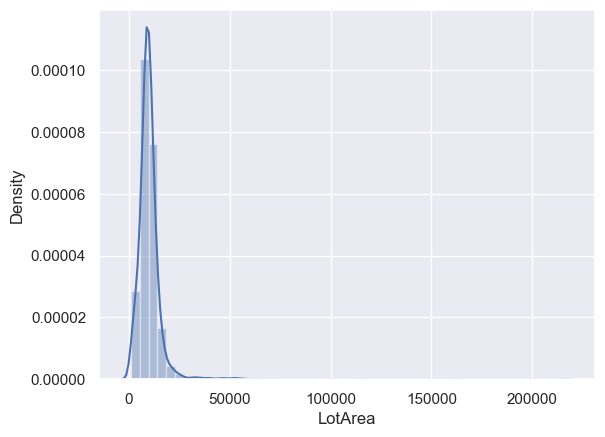

In [70]:
sns.distplot(all_data['LotArea'])

# One-Hot Encoding

In [71]:
tmp_data = pd.get_dummies(tmp_data, drop_first=True)
print(tmp_data.shape)

(2919, 11)


In [72]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,25.503637,2003,7,4,17.162564,548.0,1.228655,True,False,False,False
1,26.291998,1976,6,7,15.856944,460.0,1.597540,True,False,False,False
2,27.300424,2001,7,4,17.356042,608.0,1.228655,True,False,False,False
3,26.259338,1915,7,4,17.180669,642.0,1.228655,True,False,False,False
4,28.868815,2000,8,4,18.303173,836.0,1.228655,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2914,17.719351,1970,4,6,15.262547,0.0,1.597540,True,False,False,False
2915,17.619961,1970,4,4,15.262547,286.0,1.597540,True,False,False,False
2916,31.239346,1960,5,6,15.729901,576.0,1.597540,True,False,False,False
2917,26.821947,1992,5,4,14.788544,0.0,1.597540,False,False,True,False


In [73]:
one_hot_columns = tmp_data.columns

# Scaling

In [74]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(tmp_data)
tmp_data = scaler.transform(tmp_data)

# Split Train Test

In [75]:
X_train = tmp_data[:ntrain]
X_test = tmp_data[ntrain:]

X_train.shape, X_test.shape, y_train.shape

((1460, 11), (1459, 11), (1460,))

# Modelling

## Kfold and Evaluation Score

In [78]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score) 
    
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2) 
    score = [r2_val_score.mean()]
    return score

## Linear Regression

In [79]:
import sklearn.linear_model as linear_model

LR = linear_model.LinearRegression()
test_model(LR)

[0.8270538402865231]

## Lasso Regression

In [80]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.8285487161464014]

## SVR

In [81]:
from sklearn.svm import SVR
svr_reg = SVR(kernel= 'rbf')
test_model(svr_reg)

[-0.0030969013656591826]

In [82]:
!pip install --upgrade xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/94/41/143e80c1f48f7e826380f382dff6caf93a698c77bf2e9e38290bbbfbfe42/xgboost-1.7.6-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.8 MB/s eta 0:00:0000:0100:01


In [83]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
test_model(xgb_reg)

[0.8145081839552304]

In [84]:
all_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,None,548.0,Gd
1,9600,1976,6,8,1262,None,460.0,TA
2,11250,2001,7,5,1786,None,608.0,Gd
3,9550,1915,7,5,1717,None,642.0,Gd
4,14260,2000,8,5,2198,None,836.0,Gd
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,None,0.0,TA
2915,1894,1970,4,5,1092,None,286.0,TA
2916,20000,1960,5,7,1224,None,576.0,TA
2917,10441,1992,5,5,970,Shed,0.0,TA


## Coba Prediksi Data Baru

In [103]:
model = xgb_reg.fit(X_train, y_train)

In [104]:
model.predict(tmp_data[0].reshape(1,-1))

array([2.5843282], dtype=float32)

In [106]:
np.expm1(2.5843282)

12.254381804649539

In [88]:
all_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      2919 non-null   int64  
 1   YearBuilt    2919 non-null   int64  
 2   OverallQual  2919 non-null   object 
 3   OverallCond  2919 non-null   object 
 4   GrLivArea    2919 non-null   int64  
 5   MiscFeature  2919 non-null   object 
 6   GarageArea   2919 non-null   float64
 7   KitchenQual  2919 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 182.6+ KB


In [89]:
all_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,None,548.0,Gd
1,9600,1976,6,8,1262,None,460.0,TA
2,11250,2001,7,5,1786,None,608.0,Gd
3,9550,1915,7,5,1717,None,642.0,Gd
4,14260,2000,8,5,2198,None,836.0,Gd
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,None,0.0,TA
2915,1894,1970,4,5,1092,None,286.0,TA
2916,20000,1960,5,7,1224,None,576.0,TA
2917,10441,1992,5,5,970,Shed,0.0,TA


In [109]:
df_train

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
0,8450,2003,7,5,1710,NaN,548,Gd,2.583824
1,9600,1976,6,8,1262,NaN,460,TA,2.573300
2,11250,2001,7,5,1786,NaN,608,Gd,2.589054
3,9550,1915,7,5,1717,NaN,642,Gd,2.553297
4,14260,2000,8,5,2198,NaN,836,Gd,2.597433
...,...,...,...,...,...,...,...,...,...
1455,7917,1999,6,5,1647,NaN,460,TA,2.570514
1456,13175,1978,6,6,2073,NaN,500,TA,2.584365
1457,9042,1941,7,9,2340,Shed,252,Gd,2.602181
1458,9717,1950,5,6,1078,NaN,240,Gd,2.554469


In [90]:
data_baru = {'LotArea': [8450], 
             'YearBuilt':[2003], 
             'OverallQual':['7'], 
             'OverallCond':['5'], 
             'GrLivArea':[1710],
            'MiscFeature':['None'], 
             'GarageArea': [548], 
             'KitchenQual': ['Gd']}

In [91]:
tmp = pd.DataFrame(data_baru)

In [92]:
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,None,548,Gd


In [93]:
data_baru['OverallQual'] = encoders['OverallQual'].transform(tmp['OverallQual'])[0]
data_baru['OverallCond'] = encoders['OverallCond'].transform(tmp['OverallCond'])[0]
data_baru['KitchenQual'] = encoders['KitchenQual'].transform(tmp['KitchenQual'])[0]


In [94]:
data_baru['LotArea'] = boxcox1p(tmp['LotArea'], lam)[0]
data_baru['GrLivArea'] = boxcox1p(tmp['GrLivArea'], lam)[0]
data_baru['KitchenQual'] = boxcox1p(data_baru['KitchenQual'], lam)

In [95]:
data_baru

{'LotArea': 25.503637040790046,
 'YearBuilt': [2003],
 'OverallQual': 7,
 'OverallCond': 4,
 'GrLivArea': 17.162564178531092,
 'MiscFeature': ['None'],
 'GarageArea': [548],
 'KitchenQual': 1.2286546980775868}

In [96]:
tmp = pd.DataFrame(data_baru)

In [97]:
tmp = pd.get_dummies(tmp, columns = ['MiscFeature'])

In [98]:
one_hot_columns

Index(['LotArea', 'YearBuilt', 'OverallQual', 'OverallCond', 'GrLivArea',
       'GarageArea', 'KitchenQual', 'MiscFeature_None', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'MiscFeature_TenC'],
      dtype='object')

In [99]:
for kolom in one_hot_columns:
    if kolom not in tmp.columns:
        tmp[kolom] = 0

In [100]:
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,25.503637,2003,7,4,17.162564,548,1.228655,True,0,0,0


In [101]:
tmp_scaled = scaler.transform(tmp.loc[0].values.reshape(1,-1))

In [107]:
y = np.expm1(model.predict(tmp_scaled))
print(y)

[12.254381]


In [108]:
df_train

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
0,8450,2003,7,5,1710,NaN,548,Gd,2.583824
1,9600,1976,6,8,1262,NaN,460,TA,2.573300
2,11250,2001,7,5,1786,NaN,608,Gd,2.589054
3,9550,1915,7,5,1717,NaN,642,Gd,2.553297
4,14260,2000,8,5,2198,NaN,836,Gd,2.597433
...,...,...,...,...,...,...,...,...,...
1455,7917,1999,6,5,1647,NaN,460,TA,2.570514
1456,13175,1978,6,6,2073,NaN,500,TA,2.584365
1457,9042,1941,7,9,2340,Shed,252,Gd,2.602181
1458,9717,1950,5,6,1078,NaN,240,Gd,2.554469
